In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] =False
import seaborn as sns
from plotnine import *
import missingno as msno
from wordcloud import WordCloud

국군간호사관학교 졸업인원 => https://www.data.go.kr/data/15088825/fileData.do

In [2]:
df1 = pd.read_csv('./data/국방부_국군간호사관학교 졸업통계_20210916.csv', encoding='euc-kr')
df1

,연도,전공계열,졸업인원(명)
0,2017,간호학과,78
1,2018,간호학과,78
2,2019,간호학과,84
3,2020,간호학과,75
4,2021,간호학과,80


In [3]:
df_year = df1['연도']
df_people = df1['졸업인원(명)']

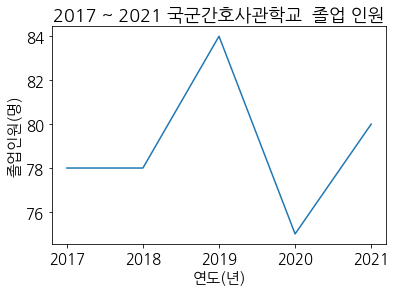

In [4]:
plt.plot(df_year, df_people)
plt.title('2017 ~ 2021 국군간호사관학교  졸업 인원')
plt.xlabel('연도(년)')
plt.ylabel('졸업인원(명)')
plt.show()

국방부 사망사고 통계 => https://www.data.go.kr/data/15038397/fileData.do

In [5]:
died = pd.read_csv('./data/국방부_사망사고 통계_20200930.csv', encoding='euc-kr')
died

,순번,년도,군기사고(자살),군기사고(총기),군기사고(폭행),군기사고(기타),안전사고(차량),안전사고(함정항공),안전사고(폭발),안전사고(추락충격),안전사고(익사),안전사고(화재),안전사고(기타),군자살률(10만명당),민간자살률(10만명당)
0,1,2009,81,0,0,0,13,0,0,8,7,0,4,12.40,31.0
1,2,2010,82,0,1,0,9,13,0,8,4,0,12,12.60,31.2
2,3,2011,97,4,0,0,18,5,1,5,2,0,11,15.20,31.7
3,4,2012,72,0,1,0,17,1,0,5,2,3,10,11.10,28.1
4,5,2013,79,0,0,1,15,2,0,7,6,0,7,12.20,28.5
5,6,2014,67,5,1,3,12,0,1,2,3,0,7,10.20,27.3
6,7,2015,57,0,0,8,6,0,1,5,5,0,11,8.70,26.5
7,8,2016,54,0,0,3,5,7,3,4,0,0,5,8.20,25.6
8,9,2017,51,0,0,1,10,0,3,1,3,0,6,8.00,24.3
9,10,2018,56,0,0,4,6,7,1,4,5,1,2,8.78,21.5


In [6]:
died.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   순번            11 non-null     int64  
 1   년도            11 non-null     int64  
 2   군기사고(자살)      11 non-null     int64  
 3   군기사고(총기)      11 non-null     int64  
 4   군기사고(폭행)      11 non-null     int64  
 5   군기사고(기타)      11 non-null     int64  
 6   안전사고(차량)      11 non-null     int64  
 7   안전사고(함정항공)    11 non-null     int64  
 8   안전사고(폭발)      11 non-null     int64  
 9   안전사고(추락충격)    11 non-null     int64  
 10  안전사고(익사)      11 non-null     int64  
 11  안전사고(화재)      11 non-null     int64  
 12  안전사고(기타)      11 non-null     int64  
 13  군자살률(10만명당)   11 non-null     float64
 14  민간자살률(10만명당)  10 non-null     float64
dtypes: float64(2), int64(13)
memory usage: 1.4 KB


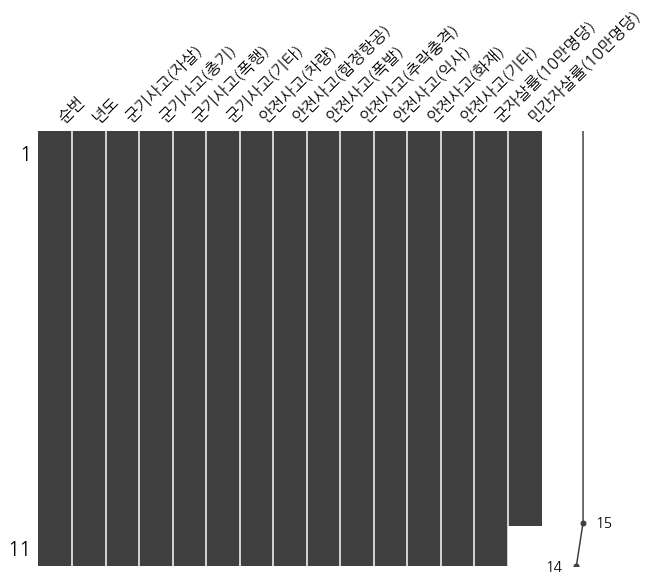

In [7]:
msno.matrix(died, figsize=(10, 8))
plt.show()

In [8]:
died['민간자살률(10만명당)'].fillna(0, inplace=True)

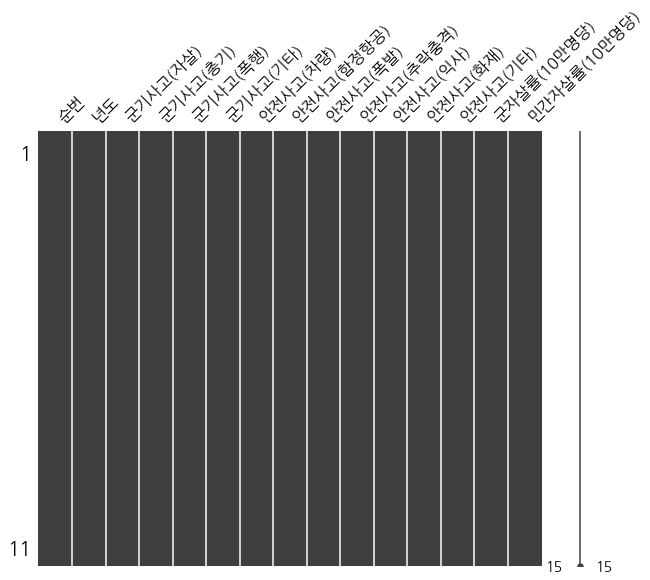

In [9]:
msno.matrix(died, figsize=(10, 8))
plt.show()

In [10]:
died.columns

Index(['순번', '년도', '군기사고(자살)', '군기사고(총기)', '군기사고(폭행)', '군기사고(기타)', '안전사고(차량)',
       '안전사고(함정항공)', '안전사고(폭발)', '안전사고(추락충격)', '안전사고(익사)', '안전사고(화재)',
       '안전사고(기타)', '군자살률(10만명당)', '민간자살률(10만명당)'],
      dtype='object')

In [11]:
died['군기사고 합계'] = died['군기사고(자살)'] + died['군기사고(총기)'] + died['군기사고(폭행)'] + died['군기사고(기타)']
died['안전사고 합계'] = died['안전사고(차량)'] + died['안전사고(함정항공)'] + died['안전사고(폭발)'] + died['안전사고(기타)']
died['총 합계'] = died['군기사고 합계'] + died['안전사고 합계']

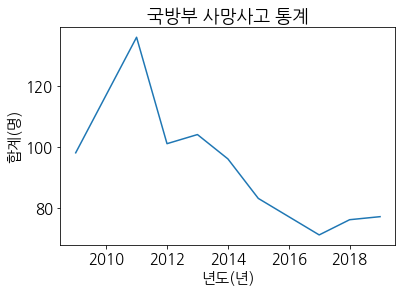

In [12]:
plt.plot(died['년도'],died['총 합계'])
plt.title('국방부 사망사고 통계')
plt.xlabel('년도(년)')
plt.ylabel('합계(명)')
plt.show()

In [13]:
shop_201806 = pd.read_csv('./data/shop_201806_01.csv', encoding='euc-kr')
shop_201806.shape

(499328, 39)

In [14]:
shop_201806.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
view = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명',  '시도명',
                      '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']
shop_2018_06 = shop_201806[view]
shop_2018_06

,상호명,지점명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,NaN,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,NaN,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,NaN,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,NaN,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...
499323,배스킨라빈스31,건대스타시티점,음식,패스트푸드,아이스크림판매,서울특별시,광진구,자양3동,자양동,서울특별시 광진구 아차산로 262,127.072944,37.536997
499324,본도시락,본설렁탕,음식,한식,설렁탕집,서울특별시,강동구,강일동,상일동,서울특별시 강동구 상일로6길 39,127.175331,37.549794
499325,체크페이먼트,NaN,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,대치4동,대치동,서울특별시 강남구 역삼로69길 10,127.054001,37.502210
499326,마젠타네일,NaN,생활서비스,이/미용/건강,발/네일케어,서울특별시,마포구,아현동,공덕동,서울특별시 마포구 마포대로 173,126.954442,37.549892


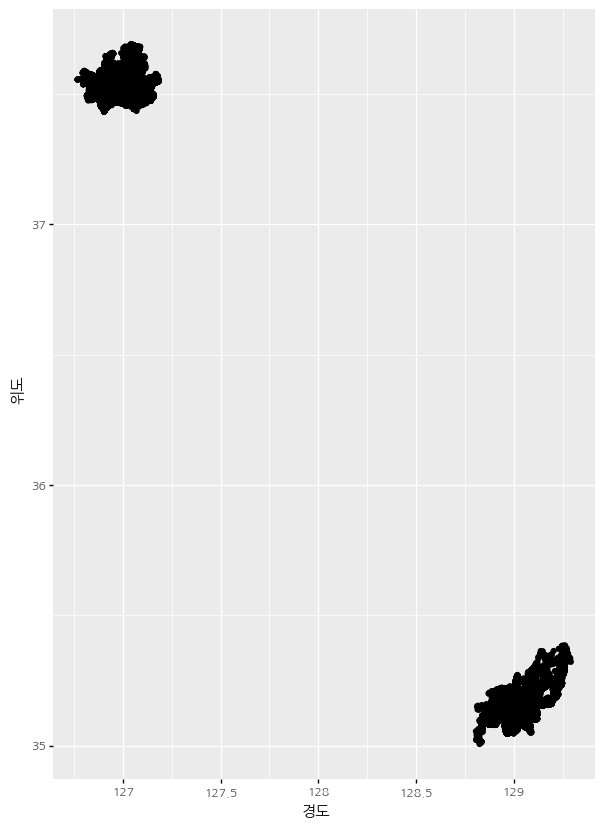

<ggplot: (-9223371921388056867)>

In [18]:
ggplot(shop_2018_06, aes(x='경도', y='위도')) \
    + geom_point() \
    + theme(text=element_text(family='NanumGothic'), figure_size=(7, 10))